In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('D:/gitHubShashank/DataScience-master/Hackathons/hackathon2Greyatom/file/data/train.csv')
df1 = pd.read_csv('D:/gitHubShashank/DataScience-master/Hackathons/hackathon2Greyatom/file/data/test.csv')


In [ ]:
df

In [3]:
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [4]:
df.sentiment.value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

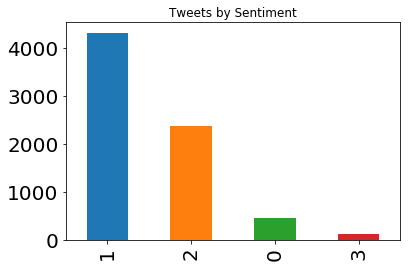

In [5]:
df.sentiment.value_counts().plot(kind='bar',title = 'Tweets by Sentiment',fontsize = 20)
plt.show()

In [7]:
df['tidy_tweet'] = df['tweet'].str.replace("@[A-Za-z]*", "")
#combi_data['tidy_tweet'] = combi_data['tweet'].str.replace("@[A-Za-z]*", "")

#df['tidy_tweet'] = df['tidy_tweet'].str.replace("#SXSW |#sxsw ", "SXevent ")


In [8]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("{link}", " ")
#combi_data['tidy_tweet'] = combi_data['tidy_tweet'].str.replace("{link}", " ")

In [9]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("&[\w]*", "")
#combi_data['tidy_tweet'] = combi_data['tidy_tweet'].str.replace("&[\w]*", "")

In [10]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
#combi_data['tidy_tweet'] = combi_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
#combi_data
df

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews One lone dude awaits iPad at Apple...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping Wi...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT New #UberSocial for #iPhone now in...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free #SXSW sampler on iTunes #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter
#from stop_words import get_stop_words
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [13]:
tokenized_tweet = df['tidy_tweet'].astype('str').apply(lambda x: x.split())
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #apple, defining, language, ...
1    [Learning, ab, Google, doodles, All, doodles, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [This, iPhone, #SXSW, app, would, b, pretty, a...
4    [Line, outside, the, Apple, store, in, Austin,...
Name: tidy_tweet, dtype: object

In [99]:
#from nltk.stem.porter import *
#stemmer = PorterStemmer()

#tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#tokenized_tweet.head()

0    [#sxswnui, #sxsw, #appl, defin, languag, of, t...
1    [learn, ab, googl, doodl, all, doodl, should, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [thi, iphon, #sxsw, app, would, b, pretti, awe...
4    [line, outsid, the, appl, store, in, austin, w...
Name: tidy_tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

In [15]:
df

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles All doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing th...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,#technews One lone dude awaits iPad at Apple s...
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,SXSW Tips Prince NPR Videos Toy Shopping With ...
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,NU user RT New #UberSocial for #iPhone now in ...
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Free #SXSW sampler on iTunes #FreeMusic
9,883,I think I might go all weekend without seeing ...,2,I think I might go all weekend without seeing ...


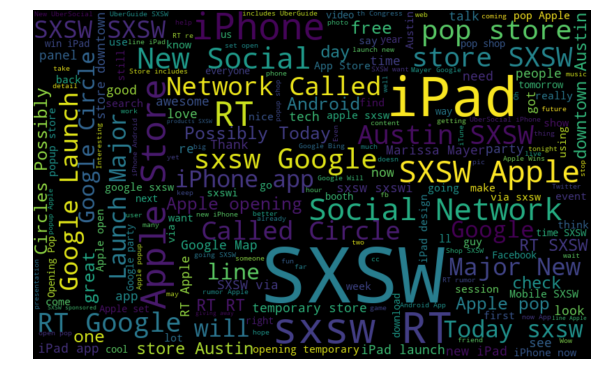

In [16]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [120]:
all_words

'#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller Learning ab Google doodles All doodles should be light funny innovative with exceptions for significant occasions #GoogleDoodle #sxsw one of the most in your face ex of stealing the show in yrs RT At #SXSW Apple schools the mkt experts This iPhone #SXSW app would b pretty awesome if it didn t crash every mins during extended browsing #Fuckit #Illmakeitwork Line outside the Apple store in Austin waiting for the new iPad #SXSW #technews One lone dude awaits iPad at Apple s SXSW store #Tech News #Apple #iPad #SXSW #tablets #tech SXSW Tips Prince NPR Videos Toy Shopping With Zuckerberg #sxsw #ipad NU user RT New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable Free #SXSW sampler on iTunes #FreeMusic I think I might go all weekend without seeing the same iPad case twice #sxsw RT Official #SXSW App SXSW GO bit ly hmiiGa #android #iphone #ipad It s official

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_train = CountVectorizer(max_df=0.90, min_df=2, max_features=3926,stop_words='english')
# bag-of-words feature matrix
Vectorizer_Train = vectorizer_train.fit_transform(df['tidy_tweet'])

In [68]:
df.shape

(7274, 4)

In [69]:
Vectorizer_Train.shape


(7274, 3926)

In [23]:
import nltk
from nltk.corpus import stopwords

In [28]:
stop_words = set(stopwords.words('english'))
remove = list(stop_words)

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mandar
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [47]:
stop_words = set(stopwords.words('english'))


In [48]:
from wordcloud import WordCloud, STOPWORDS


Positive tweets


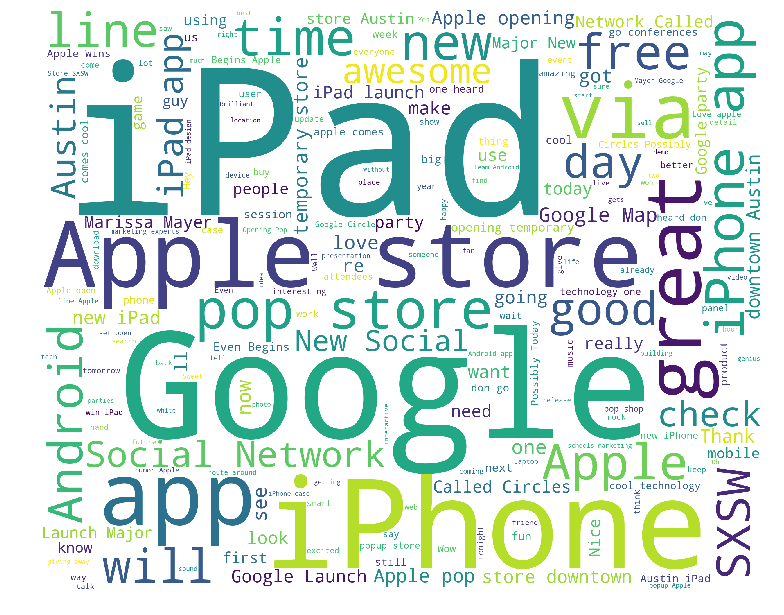

Negative tweets


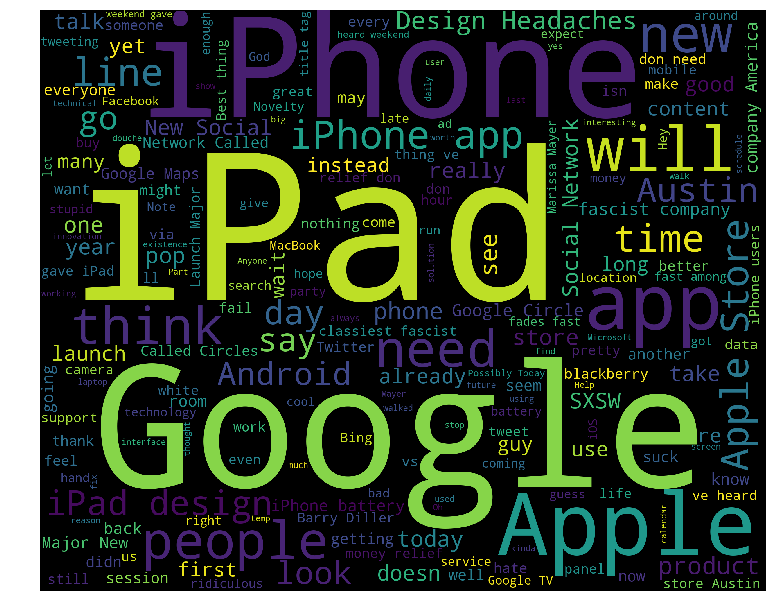

Neutral tweets


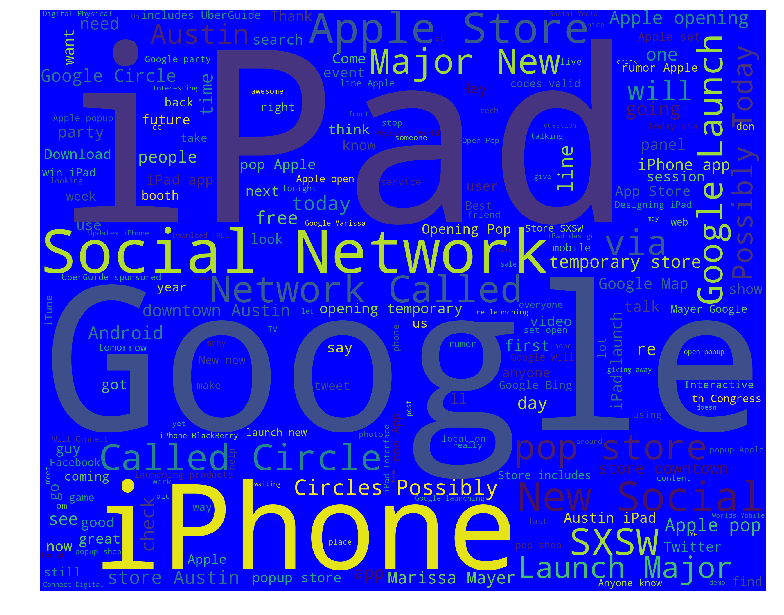

In [49]:
train_pos = df[ df['sentiment'] == 2]
train_pos = train_pos['tidy_tweet']
train_neg = df[ df['sentiment'] == 0]
train_neg = train_neg['tidy_tweet']
train_neu = df[ df['sentiment'] == 1]
train_neu = train_neu['tidy_tweet']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive tweets")
wordcloud_draw(train_pos,'white')
print("Negative tweets")
wordcloud_draw(train_neg)
print("Neutral tweets")
wordcloud_draw(train_neu, 'blue')

In [51]:
df_test = pd.read_csv('D:/gitHubShashank/DataScience-master/Hackathons/hackathon2Greyatom/file/data/test.csv')
df_test['tidy_tweet'] = df['tweet'].str.replace("@[A-Za-z]*", "")       # removed @mention
df_test['tidy_tweet'] = df['tidy_tweet'].str.replace("{link}", " ")     # removed {link}
df_test['tidy_tweet'] = df['tidy_tweet'].str.replace("&[\w]*;", "")         # Removed &amp; and $quot; like 
df_test['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")     # Removed all puntuations
df_test['tidy_tweet']= df['tidy_tweet'].astype('str').apply(lambda x: x.split())
tokenized_tweet = df['tidy_tweet'].astype('str').apply(lambda x: x.split())
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df_test['tidy_tweet'] = tokenized_tweet
#df['tidy_tweet'].str.lower()
vectorizerTest = CountVectorizer(stop_words='english')

In [52]:
newTidyTweetTest = vectorizerTest.fit_transform(df_test['tidy_tweet'])

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [79]:
from sklearn.metrics import accuracy_score,average_precision_score, precision_recall_curve, f1_score, roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV

In [65]:
Vectorizer_Train.shape

(7274, 4456)

In [63]:
y_train

(7274,)

In [66]:
X_test.shape

(1819, 3926)

In [71]:
X_train = Vectorizer_Train
X_test = newTidyTweetTest
y_train = df['sentiment']


In [72]:
over_rf = OneVsRestClassifier(RandomForestClassifier(random_state=0, n_jobs=-1))
over_rf.fit(X_train,y_train)
y_test = over_rf.predict(X_test)

In [74]:
def confusion_matrix(yActual,yPredicted):
    
    true_possitive = sum((yActual==1)&(yPredicted==1))
    true_negative = sum((yActual==0)&(yPredicted==0))
    false_possitive = sum((yActual==0)&(yPredicted==1))
    false_negative = sum((yActual==1)&(yPredicted==0))
    
    
    return true_possitive,true_negative,false_possitive,false_negative

In [76]:
def fitAndPredict(model, X_train, X_test, y_train, y_test):
#  model.fit(X_train, y_train)
  #y_pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  prec_score = precision_score(y_test, y_pred, average='macro')
  f1score = f1_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  print("Accuracy Score:{}".format(acc_score))
  print("Precision Score:{}".format(prec_score))
  print("F1 Score:{}".format(f1score))
  print("Recall:{}".format(recall))
  return acc_score, prec_score, f1score, recall
#   print("ROC score:{}".format(roc_auc_score())


In [81]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [82]:
over_df_metrics = fitAndPredict(over_rf, X_train, X_test, y_train, y_test)

Accuracy Score:1.0
Precision Score:1.0
F1 Score:1.0
Recall:1.0


In [92]:
over_dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=3,max_depth=2))
over_dt.fit(X_train,y_train)
y_test = over_dt.predict(X_test)


In [93]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
over_dt_metrics = fitAndPredict(over_dt, X_train, X_test, y_train, y_test)

Accuracy Score:1.0
Precision Score:1.0
F1 Score:1.0
Recall:1.0


In [130]:
from sklearn.cross_validation import train_test_split
X = Vectorizer_Train
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=6) 

In [131]:
Vectorizer_Train.shape

(7274, 3926)

In [132]:
df['sentiment'].shape

(7274,)

In [133]:
X_train.shape

(5091, 3926)

In [127]:
X_test.shape

(2183, 3926)

In [128]:
y_train.shape

(5091,)

In [129]:
y_test.shape

(2183,)

In [134]:
over_dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=3,max_depth=2))
over_dt.fit(X_train,y_train)
y_pred = over_dt.predict(X_test)

In [135]:
y_pred.shape

(2183,)

In [124]:
def confusion_matrix(yActual,yPredicted):
    
    true_possitive = sum((yActual==1)&(yPredicted==1))
    true_negative = sum((yActual==0)&(yPredicted==0))
    false_possitive = sum((yActual==0)&(yPredicted==1))
    false_negative = sum((yActual==1)&(yPredicted==0))
    
    
    return true_possitive,true_negative,false_possitive,false_negative

In [112]:
y_train.shape

(5091,)

In [113]:
y_test.shape

(2183,)

In [136]:
# Calculating for random forest
true_possitive,true_negative,false_possitive,false_negative = confusion_matrix(y_test,y_pred)

accuracy = (true_possitive + true_negative)/(true_possitive + true_negative + false_possitive + false_negative)
print('Accuracy  = ',accuracy)

precision = (true_possitive)/(true_possitive +false_possitive)
print('Precsion = ',precision)

recall = (true_possitive)/(true_possitive +false_negative)
print('Recall  = ',recall)

f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score  = ',f1_score)

Accuracy  =  0.9160197600564574
Precsion =  0.9188034188034188
Recall  =  0.9961389961389961
F1 score  =  0.9559095961467209


In [142]:
y_pred

<function ndarray.astype>

In [146]:
y_pred.shape

(2183,)

In [147]:
df1.shape

(1819, 2)

In [150]:

y_pred_test = over_dt.predict(newTidyTweetTest)

In [151]:
y_pred_test.shape

(1819,)

In [152]:
df1['sentiment']=y_pred_test

In [153]:
df1.head()

,tweet_id,tweet,sentiment
0,7506,Audience Q: What prototyping tools do you use?...,1
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,1
2,247,@mention and here's a pic of you winning your...,1
3,7688,Google Marissa Mayer: mobile phone as a cursor...,1
4,3294,#SXSW Google maps is even cooler than I thought,1


In [164]:
df1.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,1
4,3294,1


In [162]:
submissionFile=df1


In [165]:
submissionFile.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,1
4,3294,1


In [166]:
submissionFile.to_csv('D:/gitHubShashank/DataScience-master/Hackathons/hackathon2Greyatom/file/data/SecondSubmission.csv',encoding='utf-8')